<img src="https://static.uni-graz.at/fileadmin/nawi-institute/Erdwissenschaften/NawiGrazGeozentrum_Small.png" align="right" width=200>

# Notebook 5: Analyzing data with pandas

*Developed by Raoul Collenteur and Johannes Haas, Institute of Earth Sciences, NAWI Graz Geocenter, University of Graz.*

In this Notebook we will look into Pandas. Pandas (http://pandas.pydata.org) is the Python data analysis package that can be used for many different tasks you might have in Python. 
In the last lectures we already read and used data in various forms.
In this lecture we will look a little closer at Pandas, the most common data types and its powerfull capabilities.




## Lecture content

1. [Repeating last week](#1-Repeating-last-week)
2. [Some pointers on file types](#2-Some-pointers-on-file-types)
3. [Reading data with pandas](#3-Reading-data-with-pandas)
4. [Basic statistics and accessing data](#4-Basic-statistics-and-accessing-data)
5. [Plotting data](#5-Plotting-data)
6. [Working with real time series data](#6-Working-with-real-time-series-data)
7. [Writing data with pandas](#7-Writing-data-with-pandas)



In [2]:
# Import the python packages needed in this session
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# 1 Repeating last week

### Functions
Last week we looked into functions, reusable sequences of Python code that can be used to perform a certain task multiple times. Let's look at these once again.

In [ ]:
def multiply2(a, b=2):
    val = a * b
    return val

print(multiply2(5)) # No need to fill in the value b
print(multiply2(5, 3)) # But we still can

### Reading CSV files

There are many ways to read CSV files.
Last lecture we used `loadtxt` from numpy which while quite straightforward still leaves lots to be desired with more complicated data.
Thus the most widely used and most important one for our purposes is `read_csv()` from the [pandas](http://pandas.pydata.org/) package which will be introduced in this lecture.
When we read the clast size chart in the last lecture, we passed a certain number of columns to the reader, to only get the data:

In [8]:
fname = "Size-Slope-Data-Points.csv"

# Go through all of the (keyword) arguments to see what they do
data = np.loadtxt(fname, delimiter=";", usecols=[2,3,4,5], skiprows=1)
print(data)

[[ 1.600e+01  1.000e-01 -4.000e+00  5.710e+00]
 [ 2.600e+00  9.500e-02 -1.379e+00  5.430e+00]
 [ 2.000e+00  5.500e-02 -1.000e+00  3.150e+00]
 ...
 [ 1.700e-01  1.100e-02  2.556e+00  6.400e-01]
 [ 1.400e+02  2.700e-01 -7.129e+00  1.511e+01]
 [ 7.000e+01  1.230e-01 -6.129e+00  7.010e+00]]


However, if we look at the original spreadsheet, we lost quite a bit of information now, like the row headers and references

    Reference    Type  Clast size (mm) Slope (tan β)	Clast size (Φ)	Slope (°)
    Bradbury1992 Beach 16.00           0.100	        -4.000	        5.71
    Mason1989    Beach 2.60            0.095	        -1.379	        5.43
    Mason1989    Beach 2.00            0.055	        -1.000	        3.15
    and so on…

If we want to have those in python, it seems simple to just leave away `usecols` and `skiprows` to get all of the file:

In [9]:
data = np.loadtxt(fname, delimiter=";")
print(data)

ValueError: could not convert string to float: 'Reference'

As you can clearly see, this does not work, as `loadtxt` simply assumes we're feeding it numbers, but obviously `'Reference'` can't be turned into a floating point number.
There are of course ways to handle *complicated* data with `loadtxt`, but we'll work with pandas from nowon, which also has other benefits.

# 2 Some pointers on file types


## Common file types

If you look around on your computer, you'll find various files, generally marked by a symbol/icon and their file extension. E.g a page of paper with a "W" and the ending `.doc` or `.docx` is a word file, if that "W" is an "X" and it ends with `.xls` or `.xlsx`, it's an excel file, and so on.

So normally, you just doubleclick a file, and windows (or OSX or Linux...) knows what to do with it, and thanks to the icon, you know what's likely going to happen ("W" indicates that word will start...). However, this system has some limitations:
When you change the file ending, you don't necessarily change the file. And icons that point to specific applications can hide the fact that there's also other applications that can open said files.
And as you probably have already realized, windows sometimes gets confused when saving files from the internet or when opening files it does not know. E.g. when your browser tries to save our notebooks as `.htm` or when you try to open our `.ipynb` files with a simple doubleclick.
So this simple principle offers some pitfalls, when you venture away from the small bunch of standard MS-Office files or when you are working with files that can be opened with many different applications.

There are various ways to improve this situation such as "[magic numbers](https://en.wikipedia.org/wiki/Magic_number_(programming))" and the use of metadata. However, for our use case, the file extension and a bit of thinking will work.

## Text files

Most of the files we are using are just simple text files.
E.g., the jupyter notebook is also just a simple text file, but with the ending `.ipynb` and certain rules that govern its structure.
If you've tried opening a notebook with a doubleclick, you probably got a text editor showing you something like this:

    {
     "cells": [
      {
       "cell_type": "markdown",
       "metadata": {},
       "source": [
        "<img src=\"https://static.uni-graz.at/fileadmin/nawi-institute/Erdwissenschaften/NawiGrazGeozentrum_Small.png\" align=\"right\" width=200>\n",
        "\n",
        "# Notebook 5: Analyzing data with pandas\n",
        "\n",
        "*Developed by Raoul Collenteur and Johannes Haas, Institute of Earth Sciences, NAWI Graz Geocenter, University of Graz.*\n",
        "\n",
        "In this Notebook we will look into Pandas. Pandas (http://pandas.pydata.org) is the Python data analysis package that can be used for many different tasks you might have in Python. \n",
        "In the last lectures we already read and used data in various forms.\n",
        "In this lecture we will look a little closer at Pandas, the most common data types and its powerfull capabilities.\n",
        "\n",
        "\n",
        "\n",
        "\n",
        "## Lecture content\n",
        "\n",
        "1. [Repeating last week](#1-Repeating-last-week)\n",
        "2. [Some pointers on file types](#2-Some-pointers-on-file-types)\n",
        "2. [Working with loops](#2-Introducing-For-loops)\n",
        "3. [Conditional statements](#3-Conditional-statements)"
       ]
      },

You can probably already read quite a bit of this code, applying what you have learned so far, even though you probably don't know the *language* it is written in.

For just editing the notebook, a text editor would work just as well as our browser, but we have to deal with much more formatting commands and we can not work with the python parts interactively.

Similarly, the CSV files from the previous lecture, are also nothing more than a text file (`.txt`) with a different file extension (`.csv`) and a few rules for its formatting.


`CSV` stands for *comma separated value(s)*, meaning that your csv file is just a text file (`.txt`) with a comma separating the values. E.g.:

    apples,  USD, 5.99
    oranges, USD, 7.99
    bananas, USD, 3.99

However, keep in mind that this, like most things in IT, follows US standards!
For Austria, where we are using the `,` as a decimal point, using the comma also as a separator would cause confusion:

    Äpfel,   EUR, 5,48
    Orangen, EUR, 7,31
    Bananen, EUR, 3,65
    
   
So in Austria, the semicolon `;` tends to get used as the separator.
Since the csv file is just a text file, this does not really matter, however, you have to remember that you have to specify these things, using the `sep=` and `decimal=` options later on.

# 3 Reading data with pandas

To start with, we're reusing the data from *Bujan, Nans, Cox, Ronadh, & Masselink, Gerd. (2018). From fine sand to boulders: examining the relationship between beach-face slope and sediment size* that we already used last lecture.
Please make sure that the `Size-Slope-Data-Points.csv` file from last week is in the same folder as this notebook!

As we have seen above, simply trying to read all of the file with `np.loadtxt` fails, so let's switch over to `pd.read_csv`.

## Read the data using Pandas read_csv method

If we just try to read it without any arguments, we're likely already getting quite a bit further than with `np.loadtxt`:

In [13]:
pd.read_csv('Size-Slope-Data-Points.csv')

,Reference;Type;Clast size (mm);Slope (tan β);Clast size (Φ);Slope (°);
0,Bradbury1992;Beach;16.00;0.100;-4.000;5.71;
1,Mason1989;Beach;2.60;0.095;-1.379;5.43;
2,Mason1989;Beach;2.00;0.055;-1.000;3.15;
3,Sherman1993;Beach;32.00;0.240;-5.000;13.50;
4,Jennings2002;Beach;3.53;0.140;-1.820;7.97;
...,...
2139,Komar1998;Beach;0.21;0.012;2.243;0.69;
2140,Komar1998;Beach;0.19;0.011;2.395;0.63;
2141,Komar1998;Beach;0.17;0.011;2.556;0.64;
2142,Brayne2015;Beach;140.00;0.270;-7.129;15.11;


No error, but in the example above, we clearly don't have useable data, thanks to using `;` as separator (if you have saved it in a different way, your result might look different).

## Exercise 1: Read data

Have a look at the csv file in a text editor and check out the documentation for `pd.read_csv` to figure out how to properly read in the data

In [ ]:
# Type your answer here

[Answer](#Exercise-1)

# 4 Basic statistics and accessing data

So what can we do with this `data` now?

What type of data is it actually?

What's in it?

Let's have a look at some basic things we can do with pandas:

First we'll figure out the type of the data and have a look at it's top end:

In [18]:
type(data) # the type function we already used quite often also works here

pandas.core.frame.DataFrame

In [24]:
data.head() # head gives us the top of the dataframe. We can pass how many lines we want to see as an argument

,Type,Clast size (mm),Slope (tan),Clast size (),Slope (deg)
Reference,,,,,
Bradbury1992,Beach,16.00,0.100,-4.000,5.71
Mason1989,Beach,2.60,0.095,-1.379,5.43
Mason1989,Beach,2.00,0.055,-1.000,3.15
Sherman1993,Beach,32.00,0.240,-5.000,13.50
Jennings2002,Beach,3.53,0.140,-1.820,7.97


As you can clearly see, we get a much nicer output than the array we produced with `np.loadtxt`.
We could also look at the bottom 10 rows of the dataframe with `data.tail(10)`.

Besides this quick look at the data, pandas also had loads of functions built in, that let us find a lot of info about our dataset very quickly and easily.

In [32]:
data.describe() 

,Clast size (mm),Slope (tan),Clast size (),Slope (deg)
count,2144.000000,2144.000000,2144.000000,2144.000000
mean,15.696101,0.102103,0.165686,5.786889
std,66.560902,0.073443,2.724730,4.032175
min,0.070000,0.008000,-9.589000,0.460000
25%,0.270000,0.049750,-0.284000,2.830000
50%,0.430000,0.090000,1.228000,5.140000
75%,1.220000,0.135000,1.869250,7.672500
max,770.150000,0.830000,3.855000,39.690000


`describe` already gives us a lot of info in one neat table.
However, if we need, say the mean, for other calculations, we of course need some `data_mean = float` variable.
We can simply access things like `count`, `mean` and so on

In [54]:
#data.min() # Minimum
#data.max() # Maximum
#data.std() # Standard deviation
data.mean()

Clast size (mm)    15.696101
Slope (tan)         0.102103
Clast size ()       0.165686
Slope (deg)         5.786889
dtype: float64

but this still does not give us the single value we want.

So wee need to be able to select data to produce a single mean for example for the Clast size.
As always, there are many different ways to get to this result.

The first and most useful, is to select only the Clast size data from the original dataframe, and then to calculate the mean for that.
Since we have set our first row as the header, we can simply use this as a key to select the data:


In [57]:
data['Clast size (mm)'].mean() # make sure to pass the key as a string and take care of the spaces!

15.696100746268655

In [81]:
# or
data_mean = data['Clast size (mm)'].mean() # if we want to set it as a variable to use later.

We can also pass the `loc` argument with our header, but then we also must specify that we want the whole row:

In [112]:
data.loc[:,'Clast size (mm)'].mean()

15.696100746268655


If you have data without headers, or if you want to iterate over a dataframe, you can also [select by postion](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#selection-by-position), using [iloc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html?highlight=iloc#pandas.DataFrame.iloc):

In [65]:
data.iloc[:,1].mean() # select all (:) of the second row (1, remember zero based indexing!)

15.696100746268655

We could also use this on `describe`, which also outputs a dataframe, or a the series, which is the output of mean:

In [66]:
data_desc = data.describe() 
print(type(data_desc))

<class 'pandas.core.frame.DataFrame'>


In [73]:
data_desc['Clast size (mm)'][1] # second row of the 'Clast size (mm)' column

15.696100746268655

In [113]:
data_desc.loc['mean', 'Clast size (mm)'] # Column with the index 'mean' and row with 'Clast size (mm)'

15.696100746268655

In [77]:
data_desc.iloc[1,0] # here we do not need to select the whole colum and then do the mean, but just one cell!

15.696100746268655

In [78]:
data_mean = data.mean()
print(type(data_mean))

<class 'pandas.core.series.Series'>


In [80]:
data_mean[0] # a series has just one dimension, so we only need to pass one argument to select its first entry

15.696100746268655

Which method you want to use probably depends on how you are working with your data.
**Just remember:**

The beauty of a python script or jupyter notebook is the ability to reuse it yourself or to share it with others. 
So make sure to use a method that is understandable by others and yourself a few weeks later!
So it's probably best to prefer the more obvious method (`data_mean = data['Clast size (mm)'].mean()`) or to use comments explaining what is what, if you must work with `iloc`.

There is of course also a way to select from a dataframe with conditional statements. Let's pick all data from a ridge with a grain size larger than 300 mm:

In [140]:
data.loc[(data['Type'] == 'Ridge') & (data['Clast size (mm)'] > 300)]

,Type,Clast size (mm),Slope (tan),Clast size (),Slope (deg)
Reference,,,,,
Zentner2009,Ridge,307.0,0.47,-8.262,25.17
Jahn2014,Ridge,307.0,0.45,-8.262,24.23
Jahn2014,Ridge,305.0,0.33,-8.253,18.26


These selection tools are quite powerful and we can use them to gain very detailed insights into our data.
However, it can quickly become very complicated to read and figure out what's happening, so it often makes sense to select with multiple intermediate steps.

## Exercise 2: Disentange the selection

Split the line below into a suitable number of steps and figure out what question this line tries to answer:

In [150]:
data.loc[(data['Type'] == 'Beach') & (data['Clast size (mm)'] < 1) & (data['Slope (deg)'] > 8)].loc['Komar1998'].iloc[:,1].mean()

0.5794117647058823

In [245]:
# Type your code here

[Answer](#Exercise-2)

### More options read and to access data

Pandas can read much more than just csv files.
You can also read Excel files with [read_excel](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html), read large, binary HDF5 files that can get much larger than what Excel allows or interface with an SQL database.
If you need to venture beyond what we tried here, the [IO documentation](https://pandas.pydata.org/docs/user_guide/io.html) is a good starting point.

Similarly, there is [many more options to select data](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) than just `loc` and `iloc` we have introduced here. 
Combined with a [MultiIndex](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html) you can construct very advanced ways to store and to select data.

# 5 Plotting data

So far, we have been using `matplotlib.pyplot` imported as `plt` for our plotting needs.
This also works with pandas, so we can easily recreate the plot from the last lecture:

Text(0, 0.5, 'Slope (deg)')

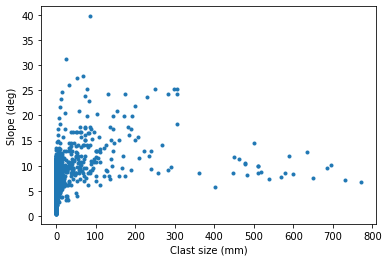

In [168]:
plt.plot(data.loc[:,], data.loc[:,'Slope (deg)'], linestyle=" ", marker=".")
plt.xlabel("Clast size (mm)")
plt.ylabel("Slope (deg)")

However, pandas dataframes also have a `plot` atribute, that can make many operations simpler and quicker.

Text(0, 0.5, 'Slope (deg)')

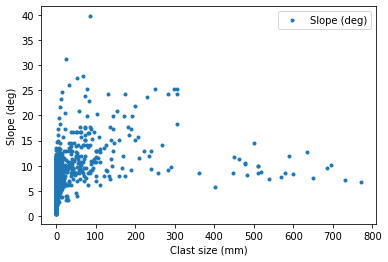

In [178]:
data.plot(x='Clast size (mm)', y='Slope (deg)', linestyle=" ", marker=".")
plt.xlabel("Clast size (mm)")
plt.ylabel("Slope (deg)")

For this simple example it doesn't make a difference, but for many other situations, it can be an advantage to use the pandas plotting functions.
E.g. lets take a look at the data above in another way:

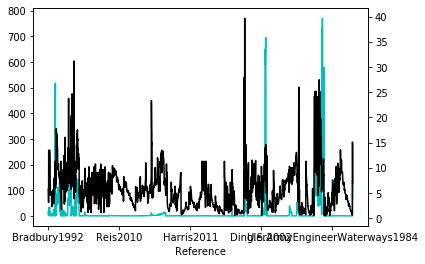

In [181]:
data.loc[:,'Clast size (mm)'].plot(color='c')
data.loc[:,'Slope (deg)'].plot(secondary_y = True, color='k')

We now can immidiately see that most of the clast sizes are below 100mm, while the slopes found by the different authors do vary quite a bit.

## Pandas time series functionality

One of the coolest features of Pandas are its time series capabilities. When the index is a collection of datetimes, we can look at the data as time series and use the built-in functionality for this. First, let's create some random data to play with.

In [182]:
# Let's create some random data to play with
index = pd.date_range(start="2000-01-01", end="2009-12-31")
values = 1 + np.sqrt(0.01 * np.arange(len(index))) + np.random.rand(len(index))
ts = pd.Series(values, index)

print("The type of variable ts is:", type(ts))

ts.head()

The type of variable ts is: <class 'pandas.core.series.Series'>


2000-01-01    1.267876
2000-01-02    1.226014
2000-01-03    1.403046
2000-01-04    1.965252
2000-01-05    1.444765
Freq: D, dtype: float64

In [183]:
# Let's look at the index, which is a DateTimeIndex
ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2009-12-22', '2009-12-23', '2009-12-24', '2009-12-25',
               '2009-12-26', '2009-12-27', '2009-12-28', '2009-12-29',
               '2009-12-30', '2009-12-31'],
              dtype='datetime64[ns]', length=3653, freq='D')

### Time series
Pandas will recognize the fact that `ts` is a time series. When you plot the time series, date time indices will be used as axis labels.
Inn this case, using the pandas plot function instead of matplotlib makes this quite a bit more convinient.

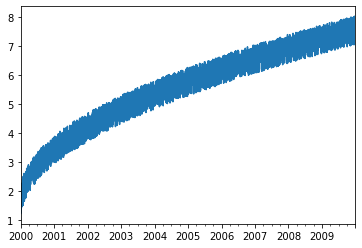

In [184]:
ts.plot()

## Exercise 3: Resample data

Use [`resample`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html?highlight=resample#pandas.DataFrame.resample) to calculate the average values for each year and plot it as red dots on top of the actual data.

In [ ]:
# Type your answer here

[Answer](#Exercise-3)

# 6 Working with real time series data

Please download the groundwater levels (*Grundwasserstand-Monatsmittel*) for well `314922` and the water levels (*W-Tagesmittel*) for river gauge `211136` from [ehyd.gv.at](https://ehyd.gv.at) and save them as `well.csv` and `river.csv`.
Let's read them in:

In [187]:
# Since ehyd data has some very questionable format decisions, we have to give read_csv quite a lot of help to get started
wellData = pd.read_csv('well.csv', sep = ';', skiprows=34, skipfooter=1, usecols=[0,1], index_col=0, parse_dates=True, dayfirst=True, names=['','level'], decimal = ',', engine='python')
riverData = pd.read_csv('river.csv', sep = ';', skiprows=23, skipfooter=1, index_col=0, parse_dates=True, dayfirst=True, names=['level'], decimal = ',', engine='python')

In [188]:
riverData.head()

,level
1976-01-02,204
1976-01-03,204
1976-01-04,204
1976-01-05,201
1976-01-06,203


In [190]:
riverData.index

DatetimeIndex(['1976-01-02', '1976-01-03', '1976-01-04', '1976-01-05',
               '1976-01-06', '1976-01-07', '1976-01-08', '1976-01-09',
               '1976-01-10', '1976-01-11',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=14975, freq=None)

Since we have specified `index_col=0, parse_dates=True, dayfirst=True` in reading the file, to make pandas aware of the fact that

 - the first column is our index
 - this index is time data
 - it is formated in the european way

we now have the data available with a DatetimeIndex, so we could immidately start selecting data with time information.

Remember *Exercise 2* from *Lecture 3* where you had to find certain values in the year 2008 in another ehyd timeseries?

It was a rather convoluted loop to grab the year 2008:

    counter = range(len(data))
    for i in counter:
        date = dates[i]
        year = date[6:11] # the year is positions 6 to 11 of the string
        year = int(year) # in order to be able to work with it, we need to turn it into a number

Now we simply can grab the year with `riverData['2008']`.
Also, we don't need to loop over the data to select it, we can simply adress the level data with a selection criteria: `twothousandeight.level > 240`.
So if we wanted to know at which days the water level was between 240 and 250 cm, it is now a simple two liner.

In [208]:
twothousandeight = riverData['2008']
twothousandeight[(twothousandeight.level > 240) & (twothousandeight.level < 250)]

,level
2008-05-16,241
2008-05-17,245
2008-06-04,248
2008-06-05,244
2008-06-07,247
2008-06-08,242
2008-08-18,246
2008-10-30,242


We can of course also plot the data, either all of it, or with the times cut out.

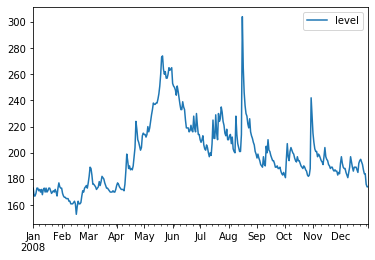

In [202]:
twothousandeight.plot()

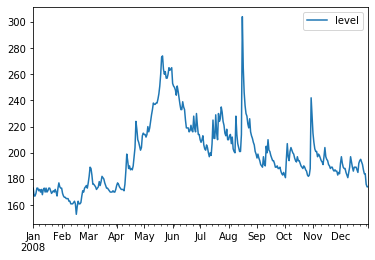

In [209]:
riverData['2008'].plot()

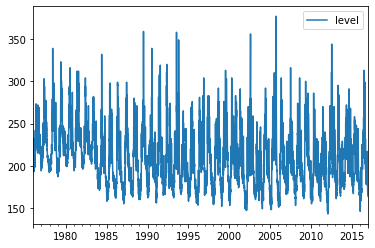

In [210]:
riverData.plot()

Even though they're time data of different resolution (daily vs monthly) we can still plot them in one plot, since pandas is aware of the nature of the the time data.

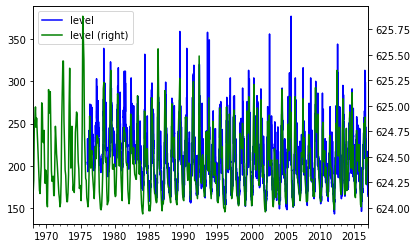

In [243]:
ax=riverData.plot(color='b')
wellData.plot(ax=ax, color='g', secondary_y=True)

## Exercise 4: Some statistics

Use pandas to obtain some basic statistics for `wellData` and `riverData`, so that you can **produce some output in the second cell below:**

In [ ]:
# Type your code here

In [241]:
print('The well Apfelberg (HZB 314922) has a mean waterlevel of', wellMean, 'meters and a median of', wellMedian, 'meters')
print('The gauge Zeltweg (HZB 211136) has a mean waterlevel of', riverMean, 'cm and a median of', riverMedian, 'cm')

The well Apfelberg (HZB 314922) has a mean waterlevel of 624.46 meters and a median of 624.39 meters
The gauge Zeltweg (HZB 211136) has a mean waterlevel of 207.41 cm and a median of 204.0 cm


[Answer](#Exercise-4)

# 7 Writing data with pandas

As explained above, pandas can read many different formats.
This also applies to writing them.
CSV-files and Excel-files are probably the most common file formats to do this and can easily be sent through email. 
Pandas has methods for different file-formats. All start with `data.to_format`, e.g., `data.to_csv` or `data.to_excel`.
Let's write our river data from 2008 to an Excel file:

In [244]:
twothousandeight.to_excel('2008.xls')

# Answers to exercises

### Exercise 1

In [ ]:
filename = 'Size-Slope-Data-Points.csv'
data = pd.read_csv(filename, sep=';', header=0, index_col=0)

`index_col=0` is optional. If you skip this, pandas just adds a numbered index. This can have benefits for some things or be annoying with others.
In this case, it doesn't mind, but later on, when we use timeseries data, this will become very important.

### Exercise 2

**What does this line try to answer?**

We simply want to know the average grain size that Komar (1998) found for grains at a beach with a slope of greater than 8°.

Again, you can do this in various different ways.
Here are two possible ways:

Apparently, we are only interested in values from the Author `Komar1998`, so it makes sense to select this `subset` first, so that we don't have to do all the selection work on data we are not interested in.

Three conditional statements in one row are probably still OK, but I'd prefer to split them by their themes, so I'm selecting the `location` and then the `grain_properties` from this `location`.

In a final step, we want to have the mean of the first column, but since we're having a nice index, I'm replacing `iloc` with `loc`, so that it becomes obvious from what we are actually calculating the mean.

In [ ]:
subset = data.loc['Komar1998']
location = subset.loc[subset['Type'] == 'Beach']
grain_properties = location.loc[(location['Clast size (mm)'] < 1) & (location['Slope (deg)'] > 8)]
grain_properties.loc[:,'Clast size (mm)'].mean()

Depending on what you need your intermediate results for, you can also reuse variables to save memory.

In [ ]:
subset = data.loc['Komar1998'] # this variable you probably want to introduce.
# would we use 'data = data.loc...' all of our 2000+ lines dataframe would be gone!
subset = subset.loc[(subset['Clast size (mm)'] < 1) & (subset['Slope (deg)'] > 8)]
subset = subset.loc[subset['Type'] == 'Beach'] # Again, we can do this in a different order. 
# But the one above probably makes more sense, since this one also selects a lot of stuff that's not on a beach
subset = subset.loc[:,'Clast size (mm)'] 
mean_grain = subset.mean()
print(mean_grain)

### Exercise 3

In [ ]:
ts.plot()
ts.resample("A").mean().plot(marker="o", c="r", linestyle=" ")

### Exercise 4

In [ ]:
wellMean = wellData.mean()
wellMedian = wellData.median()
riverMean = riverData.mean()
riverMedian = riverData.median()
wellMean = wellMean[0] # remember, the outputs of pandas statistics are series, so we need to cut them to size first
wellMedian = wellMedian[0]
riverMean = riverMean[0]
riverMedian = riverMedian[0]

In [ ]:
# if we want to make a more readable output, we could also round the numbers
wellMean = wellMean.round(2)
wellMedian = wellMedian.round(2)
riverMean = riverMean.round(2)
riverMedian = riverMedian.round(2)

In [ ]:
The well Apfelberg (HZB 314922) has a mean waterlevel of', wellMean, 'meters and a median of', wellMedian, 'meters')
print('The gauge Zeltweg (HZB 211136) has a mean waterlevel of', riverMean, 'cm and a median of', riverMedian, 'cm')